### About the Problem

With the golden age of internet and AI, the information and the opportunities accessible to humans keeps on increasing every day and thus, we humans live in an era where we can work from anywhere, easily transfer money to anybody within a minute, take help of AI models and agents to improve productivity, start our online businesses and this list keeps going on and on.  

But every coin has two sides, with the positives this new era has brought there comes a sever negative side as well. The increase of internet and AI usage brings a load of online scams like UPI payment scams, job scams, AI deep fakes etc.  

As time goes by more and more people are regularly interacting with internet, using the power of internet to make their life easier, better and more entertaining like online ordering of products, online bookings for restaurants, watching reels on social media for instant gratification etc. As the number of online interactions and transaction increase the chance of frauds increase as well and thus, more proactive and smart measures are needed to identify these frauds as early as possible and identify ways to prevent them.

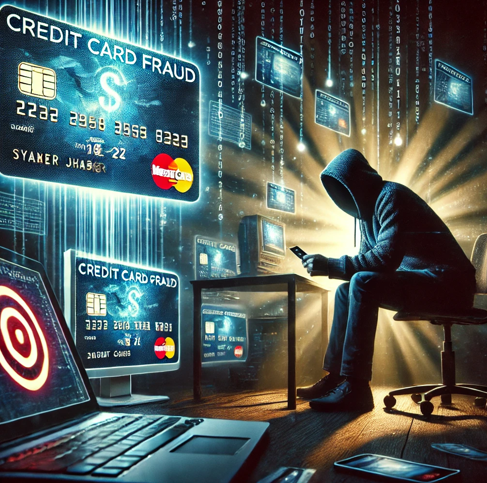

One common scam is of **CREDIT CARD FRAUD** which is basically the act of using another person’s credit card to make purchases or request cash advances without the cardholder’s knowledge or consent. Credit card fraud is increasingly prevalent, with projections from the Nilson Report estimating losses could soar to an astonishing $38.5 billion by 2027.  

This can happen through many ways like RFID cloning of credit card chips, physical theft of card, credit card data leakage, account information leak, fake calls behaving as banks asking for sensitive information and identitiy theft. No matter how your card details got out, one thing we can say about all these is that the fradulent transaction that would occur afterwards will most likely be significantly different from other purchases you have done earlier.  

Using the advent of big data(multiple customer's transaction data) and the power of Machine learning(ML), we can automate the process of identifying patterns associated with these fradulent transactions which help us differentiate them from normal transactions and thus, can help the credit card issuer deny these fradulent transactions or require stronger identity verification, if detected. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  

Having dynamic systems in place that can achieve this will help:  
1. Provide financial protection for both cardholder and financial institution.  
2. Improve customer trust and maintain reputation of the company.  
3. Adhere to Legal compliance.  
4. Gain insights into the frauds, spread awareness and develop strategies to mitigate them.

### About the Dataset

**Information as provided by the dataset creator:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.  

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Objective

Some key things that I want to achieve with this project:  
1. Learn about credit card fraud detection and its intricacies.  
2. Develop an end-to-end ML project with deployment in AWS cloud.  
3. Use modular coding and proper documentation.  
4. Develop a small Flask web app which can be used as an interface for training and prediction on new data.
3. Use git and github for version control.  
6. Practice, practice and practice.

If anyone's interested, they can check out following github rep for the end-to end implementation of this project: https://github.com/Sharma-Ayush/Credit-Card-Fraud-Detection.git

<u>PS:</u>  
- Feel free to contact me if you have any doubts or feedback through the comment section or my socials.
- Please upvote the notebook if you like it, as it would motivate me to develop more projects like these.

### Socials

Follow me on these platforms, for more such content:  

LinkedIn: https://www.linkedin.com/in/ayush-sharma-660831125/  
Github: https://github.com/Sharma-Ayush  
Kaggle: https://www.kaggle.com/ayushsharma0812

### Import Required Libraries

In [29]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading and quick glance

In [30]:
#Loading the dataset
df = pd.read_csv('Data/creditcard.csv')

In [31]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 284807 rows and 31 columns


A mid-size dataset

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# Print info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset contais following columns:  
1. <u>Time:</u> The number of seconds elasped in between when the current transaction happened and the first transaction or earliest transaction of this dataset.  

2. <u>V1 to V28:</u> Information related to transaction and customer has been encoded into a PCA transformation to preserve confidentiality. Not aware if the dimensionality has been reduced or not after PCA. Information about scaling of the original features before PCA also isn't provided. It could be a loss of critical information if the features were note scaled before PCA adn reduced in dimensions after PCA.  

3. <u>Amount:</u> The amount of the transaction. The exact currency present here is not given. But most likely based on the fact that wordline is headquartered in France and the data as given is for Europe cardholders, Euro is the most likely option or maybe the data is from different part of Europes converted into one common currency but that should be unlikely as you would ideally want to investigate frauds based on regions as that would have high influence.  

4. <u>Class:</u> Target variable indicating whether the transaction is fraud or not. Encoded with binary encoding, 1 stands for fraud and 0 otherwise.


In [34]:
# Checking the distribution of the feature data types
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [35]:
df.dtypes[df.dtypes == 'int64']

Class    int64
dtype: object

Only numerical columns exist. The only column which has integer data type is our target feature itself.

In [36]:
# Checking for nulls
df.isnull().sum().value_counts()

0    31
Name: count, dtype: int64

There are no null values.

In [37]:
# Checking for duplicates
df.duplicated().sum()

np.int64(1081)

There are 1081 duplicate transactions within our dataset. Is this possible? First of all, since we don't have info about original features, it is hard to say so. Assuming ideally that transactional data and customer data were PCA transformed, then duplicates shouldn't exist until two transactions from same customer, for same products and everything else occured within 1 second. This could happen only in case of some automation of transactions on a card specifically designed to do so or it depends upon how granular the original data was. This should be talked upon with the domain expert. For now, I will drop the duplicates as they will otherwise dominate our training of ML models.

In [38]:
df.drop_duplicates(inplace = True)

In [39]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 283726 rows and 31 columns


Lastly, lets look at the distribution of the target column.

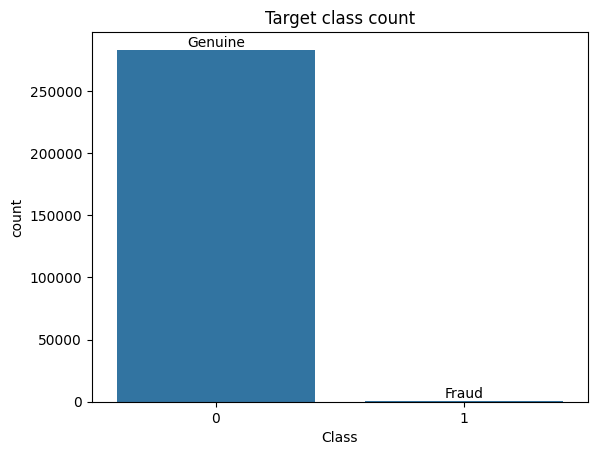

In [40]:
ax = sns.barplot(x = df['Class'].value_counts().index, y = df['Class'].value_counts())

# Add custom labels
ax.bar_label(ax.containers[0], labels=['Genuine', 'Fraud'])
plt.title('Target class count');

In [41]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Highly imbalanced dataset, will need to employ class imbalance handling techniques. If not handled the models would likely dominate towards the geunine transactions and ignore fraud transactions. This will lead to good performance on genuine transactions but poor for fraudulent transactions. 

### References

- https://www.inscribe.ai/fraud-detection/credit-fraud-detection  
- https://seon.io/resources/credit-card-fraud-detection/
- https://www.youtube.com/@krishnaik06  
- Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron